In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
nb=0
i=0
for (root,dirs,files) in os.walk('/content/drive/MyDrive/Colab Notebooks/PFA/pattern ROI/'):
    for file_ in files:
        i=i+1
        ext=file_.split('.')[1]
        if (ext=="png"):
            nb=nb+1


print("Total number of images: ",nb)
print("Total number of files: ",i)

Total number of images:  298
Total number of files:  302


In [13]:
#Deleting .Ds_Store files
import os, sys

def walk(path):
    nb=0
    for item in os.listdir(path):
        try:

            if(item == ".DS_Store"):
                print (" find file .Ds_Store")
                os.remove(path+"/"+item)
                nb=nb+1
            else:
                if(os.path.isdir(path+"/"+item)):
                          walk(path+"/"+item)
        except (OSErrorrror,e):

            print (e)
walk('/content/drive/MyDrive/Colab Notebooks/PFA/pattern ROI/')


## IN TOTAL, WE HAVE 298 IMAGES.

In [14]:
root_dst_dir = "/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/"


In [15]:
#copying files
import os, shutil

root_src_dir = "/content/drive/MyDrive/Colab Notebooks/PFA/pattern ROI/"
i=0
for src_dir, dirs, files in os.walk(root_src_dir):
    for file_ in files:
        i=i+1
        print(i)
        src_file = os.path.join(src_dir, file_)
        dst_file = os.path.join(root_dst_dir, file_)
        print(dst_file)
        if os.path.exists(dst_file):
           # os.remove(dst_file)
            name=dst_file.split('.')[0]+'(1)'+".png"  #pour les fichiers de meme nom
            shutil.copy(src_file, name)
        else:
            shutil.copy(src_file, dst_file)

1
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/16100000.png
2
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/16100001.png
3
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/16100002.png
4
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/16100003.png
5
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/16100004.png
6
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/18800000.png
7
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/18800001.png
8
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/720_1.png
9
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/720_2.png
10
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/720_1.png
11
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/720_2.png
12
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/780_1.png
13
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/780_2.png
14
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/780_1.png
15
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/780_2.pn

In [16]:
#supprimer les autres fichiers corrompus et ne garder qu'une seule copie pour les doublons(fichiers de meme noms)
import os
nb=0
for (root,dirs,files) in os.walk(root_dst_dir):
    for file_ in files:
        ext=file_.split('.')[1]
        if (ext=="png"):
            nb=nb+1
        else:
            os.remove(root+file_)


print("Total number of images:",nb)

Total number of images: 296


### On note des fautes de saisie des noms de quelques fichiers!
12800001.png 
16100004.png
16100003.png
16100002.png 
etc

In [17]:
#correction des noms des fichiers 
import os
import re
nb=0
for (root,dirs,files) in os.walk(root_dst_dir):
    for file_ in files:
        turbidity = re.findall("\d+", file_)[0]
        nb=nb+1
        if (int(turbidity)>2000):
            list1 = list(turbidity)
            list1[4:7] = '_'
            
            turbidity = ''.join(list1)
            os.rename(root+'/'+file_, root+'/'+turbidity+'_'+list1[4]+".png")

print("Total files: ",nb)

Total files:  296


In [18]:
#tester la correction des noms des fichiers
import re
import os
for (root,dirs,files) in os.walk(root_dst_dir):

    for file_ in files:
        desired_number = re.findall("\d+", file_)[0]
        if (int(desired_number)>2000):
            #print(root)
            print((desired_number ))


# Organizing data into 4 classes of turbidity

###This dataset is just for visualisation 

In [ ]:
import re
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

source=""
destination=""
sub_dir=""

histog=np.zeros(18)
for (root,dirs,files) in os.walk(a):

    for file_ in files:
        source=a+file_
        turbidity = re.findall("\d+", file_)[0] #extraire la valeur de la turbidité du nom du fichier
        print(turbidity)
        if (int(turbidity)<150):
            sub_dir="very_Low_Turbidity/"
            if (int(turbidity)<50):
              sub_s_dir="1st_subclass"
              histog[0]+=1
            elif (int(turbidity)<100):
              sub_s_dir="2nd_subclass"
              histog[1]+=1
            else:
              sub_s_dir="3rd_subclass"
              histog[2]+=1
            
        elif (int(turbidity)<400):
            sub_dir="Low_Turbidity/" 
            if (int(turbidity)<200):
              sub_s_dir="1st_subclass"
              histog[3]+=1
            elif (int(turbidity)<250):
              sub_s_dir="2nd_subclass"
              histog[4]+=1
            elif (int(turbidity)<300):
              sub_s_dir="3rd_subclass" 
              histog[5]+=1
            elif (int(turbidity)<350):
              sub_s_dir="4th_subclass"
              histog[6]+=1
            else:
              sub_s_dir="5th_subclass" 
              histog[7]+=1

        elif (int(turbidity)<700):
            sub_dir="Medium_Turbidity/"
            if (int(turbidity)<450):
              sub_s_dir="1st_subclass"
              histog[8]+=1
            elif (int(turbidity)<500):
              sub_s_dir="2nd_subclass"
              histog[9]+=1
            elif (int(turbidity)<550):
              sub_s_dir="3rd_subclass" 
              histog[10]+=1
            elif (int(turbidity)<600):
              sub_s_dir="4th_subclass"
              histog[11]+=1
            elif (int(turbidity)<650):
              sub_s_dir="5th_subclass"
              histog[12]+=1
            else:
              sub_s_dir="6th_subclass" 
              histog[13]+=1

        else:
            sub_dir="High_Turbidity/"
            if (int(turbidity)<800):
              sub_s_dir="1st_subclass"
              histog[14]+=1
            elif (int(turbidity)<900):
              sub_s_dir="2nd_subclass"
              histog[15]+=1
            elif (int(turbidity)<1000):
              sub_s_dir="3rd_subclass" 
              histog[16]+=1
            else:
              sub_s_dir="4th_subclass" 
              histog[17]+=1

        if (not os.path.exists(root_dst_dir+sub_dir)):
            os.makedirs(root_dst_dir+sub_dir)  
        if (not os.path.exists(root_dst_dir+sub_dir+sub_s_dir)):
            os.makedirs(root_dst_dir+sub_dir+sub_s_dir)           
        destination=root_dst_dir+sub_dir+sub_s_dir
        print(destination)
        shutil.move(source, destination)


1610
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/4th_subclass
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/4th_subclass
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/4th_subclass
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/4th_subclass
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/4th_subclass
1880
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/4th_subclass
1880
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/4th_subclass
720
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/1st_subclass
720
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/1st_subclass
720
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/1st_subclass
720
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidity/1st_subclass
780
/content/drive/MyDrive/Colab Notebooks/PFA/Dataset1/High_Turbidit

In [ ]:
histog

array([ 7., 12., 35., 12., 16.,  4., 11., 12., 10., 11., 19.,  7., 14.,
        0., 17., 13., 16., 70.])

NameError: ignored

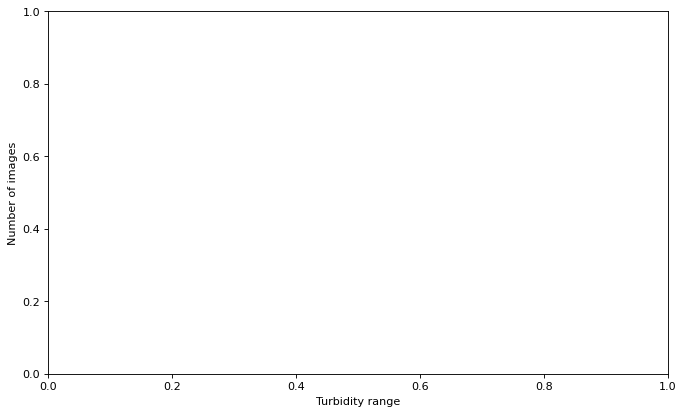

In [19]:
import matplotlib.pyplot as plt

bins = [ '50', '100', '150', '200', '250', '300', '350', '400', '450', 
                 '500', '550', '600','650','700','800','900','1000','2000']
plt.figure(figsize=(10, 6),dpi=80)
plt.ylabel('Number of images')
plt.xlabel('Turbidity range')

plt.bar( bins , histog)




The dataset that we will focus on

In [20]:
import re
import os
import shutil

source=""
destination=""
sub_dir=""
#a="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/"
root_dst_dir="/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/"
for (root,dirs,files) in os.walk(root_dst_dir):

    for file_ in files:
      source=root_dst_dir+file_
      turbidity = re.findall("\d+", file_)[0] #extraire la valeur de la turbidité du nom du fichier
      print(turbidity)
      if (int(turbidity)<150):

        sub_dir="very_Low_Turbidity/"
      elif (int(turbidity)<400):

        sub_dir="Low_Turbidity/"  
      elif (int(turbidity)<700):
        sub_dir="Medium_Turbidity/"
      else:
        sub_dir="High_Turbidity/"
        #dst_dir = src_dir.replace(root_src_dir, root_dst_dir, 1)
      if (not os.path.exists(root_dst_dir+sub_dir)):
        os.makedirs(root_dst_dir+sub_dir)            
      destination=root_dst_dir+sub_dir+file_
      print(destination)
      shutil.move(source, destination)

      
        
            


1610
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/1610_0__.png
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/1610_1__.png
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/1610_2__.png
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/1610_3__.png
1610
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/1610_4__.png
1880
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/1880_0__.png
1880
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/1880_1__.png
720
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/720_1.png
720
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/720_2.png
720
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/720_1(1).png
720
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Turbidity/720_2(1).png
780
/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/High_Tu

[]